---

## Etapa 01



### Problema modelo para o estudo inicial



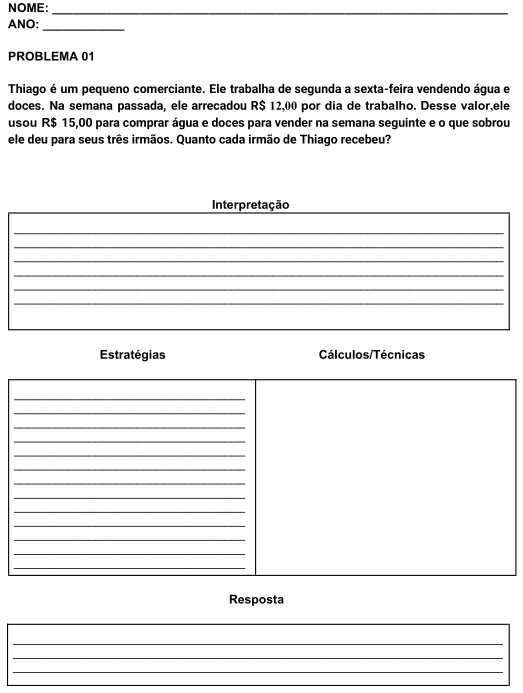

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('/home/laza/simulacao-estudo/estudos/respostas_estudantes.csv')

In [19]:
df

,Nome,Ano,Problema,Interpretação,Estratégia,Cálculo/Técnica,Resposta
0,Estudante 1,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago tem um gasto de 15 reais e ganha 12 rea...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
1,Estudante 2,9,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
2,Estudante 3,8,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Somar tudo, tirar 15 e dividir por 3.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
3,Estudante 4,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu -R$1,00."
4,Estudante 5,7,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago ganha 12 reais por dia de segunda a sex...,"Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
...,...,...,...,...,...,...,...
95,Estudante 96,6,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago trabalha 5 dias, ganha 12 por dia, tira...","Multiplicar 12 por 5, subtrair 15 e dividir po...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$15,00."
96,Estudante 97,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Ver quanto ele ganha, tirar o gasto e dividir.",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
97,Estudante 98,7,Thiago é um pequeno comerciante. Ele trabalha ...,"Thiago vende água e doces, ganha 12 reais por ...","Calcular o total ganho na semana, subtrair o g...",12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15,"Cada irmão recebeu R$0,66."
98,Estudante 99,6,Thiago é um pequeno comerciante. Ele trabalha ...,Thiago trabalha 5 dias na semana e ganha 12 re...,"Multiplicar 12 por 5, subtrair 15 e dividir po...","12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66","Cada irmão recebeu R$15,00."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome             100 non-null    object
 1   Ano              100 non-null    int64 
 2   Problema         100 non-null    object
 3   Interpretação    100 non-null    object
 4   Estratégia       100 non-null    object
 5   Cálculo/Técnica  100 non-null    object
 6   Resposta         100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


---

## Etapa 02

---
### Interpretacao

In [24]:
print(df['Interpretação'].value_counts())

Interpretação
Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.    29
Thiago tem um gasto de 15 reais e ganha 12 reais por dia, e tem 3 irmãos.                                                                        21
Thiago vende água e doces, ganha 12 reais por dia, gasta 15 e divide o resto.                                                                    20
Thiago ganha 12 reais por dia de segunda a sexta e gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.            18
Thiago trabalha 5 dias, ganha 12 por dia, tira 15 e divide o que sobra por 3.                                                                    12
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Interpretação'**

* **"Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."**: 29 ocorrências
    * Esta é a interpretação mais frequente, aparecendo 29 vezes no conjunto de dados.
* **"Thiago tem um gasto de 15 reais e ganha 12 reais por dia, e tem 3 irmãos."**: 21 ocorrências
    * Esta interpretação, ligeiramente mais curta, aparece 21 vezes.
* **"Thiago vende água e doces, ganha 12 reais por dia, gasta 15 e divide o resto."**: 20 ocorrências
    * Esta versão, com foco na venda de água e doces, ocorre 20 vezes.
* **"Thiago ganha 12 reais por dia de segunda a sexta e gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos."**: 18 ocorrências
    * Esta interpretação, que especifica os dias da semana, aparece 18 vezes.
* **"Thiago trabalha 5 dias, ganha 12 por dia, tira 15 e divide o que sobra por 3."**: 12 ocorrências
    * Esta versão mais concisa ocorre 12 vezes.

**Interpretação Geral**

* A interpretação mais comum ("Thiago trabalha 5 dias na semana e ganha 12 reais por dia, gasta 15 reais para comprar água e doces e divide o que sobra entre seus 3 irmãos.") representa uma parcela significativa das respostas, indicando uma tendência para essa formulação específica.
* As variações nas interpretações mostram que, embora haja um tema central, as pessoas expressam o problema de maneiras ligeiramente diferentes.
* É possível que o problema original, tenha sido interpretado de formas diferentes, mas com o mesmo sentido.
* É possível também que a base de dados tenha sido alimentada por mais de uma pessoa, e que as mesmas tenham parafraseado o problema de formas diferentes.

Em resumo, a análise revela que, embora haja variações na forma como o problema é interpretado, há uma versão predominante que é usada com mais frequência.





In [28]:
df['Interpretação_Comprimento'] = df['Interpretação'].str.len()
print(df['Interpretação_Comprimento'].describe())

count    100.000000
mean     104.800000
std       31.508216
min       73.000000
25%       77.000000
50%       77.000000
75%      141.000000
max      141.000000
Name: Interpretação_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Interpretação_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso significa que há 100 entradas na coluna 'Interpretação_Comprimento', indicando que o comprimento foi calculado para 100 strings na coluna 'Interpretação' original.
* **mean (Média): 104.800000**
    * O comprimento médio das strings na coluna 'Interpretação' é de aproximadamente 104.8 caracteres.
* **std (Desvio Padrão): 31.508216**
    * O desvio padrão de 31.508216 mostra que há uma variação considerável no comprimento das strings em relação à média. Isso indica que os comprimentos não são uniformes.
* **min (Mínimo): 73.000000**
    * A string mais curta na coluna 'Interpretação' tem 73 caracteres.
* **25% (Percentil 25%): 77.000000**
    * 25% das strings têm 77 caracteres ou menos.
* **50% (Mediana): 77.000000**
    * A mediana, que é o valor central, também é 77. Isso significa que 50% das strings têm 77 caracteres ou menos, e 50% têm 77 caracteres ou mais.
* **75% (Percentil 75%): 141.000000**
    * 75% das strings têm 141 caracteres ou menos.
* **max (Máximo): 141.000000**
    * A string mais longa na coluna 'Interpretação' tem 141 caracteres.

**Interpretação Geral**

* A diferença entre o mínimo e o máximo (73 e 141) e o desvio padrão relativamente alto confirmam a variabilidade no comprimento das "Interpretações".
* Os valores do percentil 25% e da mediana serem iguais, e com o valor baixo de 77, mostra que grande parte dos dados estão agrupados nos valores mais baixos.
* Os valores do percentil 75% e do máximo serem iguais, e com o valor alto de 141, mostra que boa parte dos dados estão agrupados nos valores mais altos.
* Há uma distribuição bimodal, com concentrações em comprimentos mais curtos (próximo de 77 caracteres) e comprimentos mais longos (141 caracteres).
* A média de 104.8 está mais próxima do valor máximo, isso significa que a maior parte dos dados tendem a ser mais longos.

Em resumo, a coluna 'Interpretação' contém strings com uma variação significativa de comprimento, com concentrações notáveis em comprimentos mais curtos e mais longos.




---

### Estrategia

In [31]:
print(df['Estratégia'].value_counts())

Estratégia
Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3.    41
Ver quanto ele ganha, tirar o gasto e dividir.                                                      24
Multiplicar 12 por 5, subtrair 15 e dividir por 3.                                                  19
Somar tudo, tirar 15 e dividir por 3.                                                               16
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Estratégia'**

* **"Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3."**: 41 ocorrências
    * Esta é a estratégia mais comum, aparecendo 41 vezes no conjunto de dados. Ela descreve uma abordagem passo a passo para resolver o problema.
* **"Ver quanto ele ganha, tirar o gasto e dividir."**: 24 ocorrências
    * Esta estratégia, mais concisa, aparece 24 vezes. Ela simplifica a descrição, mas mantém os elementos essenciais.
* **"Multiplicar 12 por 5, subtrair 15 e dividir por 3."**: 19 ocorrências
    * Esta estratégia, que utiliza valores numéricos específicos, ocorre 19 vezes. Ela demonstra uma abordagem mais matemática.
* **"Somar tudo, tirar 15 e dividir por 3."**: 16 ocorrências
    * Essa estratégia, mostra uma forma de resolução, mas é um pouco vaga, pois não especifica o que deve ser somado. Ocorre 16 vezes.

**Interpretação Geral**

* A estratégia mais detalhada ("Calcular o total ganho na semana, subtrair o gasto com compras e dividir o valor restante por 3.") é a mais frequente, indicando uma preferência por uma abordagem passo a passo.
* As variações nas estratégias mostram que, embora o objetivo final seja o mesmo, as pessoas abordam o problema de maneiras ligeiramente diferentes.
* Apesar de algumas variações, todas as estratégias levam ao mesmo resultado, o que muda é a forma de descrever a resolução do problema.
* A forma mais matemática de descrever a resolução do problema, também aparece bastante, mostrando que várias pessoas interpretaram o problema de forma mais direta.

Em resumo, a análise revela que há uma preferência por estratégias detalhadas, mas também há variações que refletem diferentes abordagens para resolver o mesmo problema.


In [32]:
df['Estratégia_Comprimento'] = df['Estratégia'].str.len()
print(df['Estratégia_Comprimento'].describe())

count    100.000000
mean      65.820000
std       25.587394
min       37.000000
25%       46.000000
50%       50.000000
75%       96.000000
max       96.000000
Name: Estratégia_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Estratégia_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que você tem 100 linhas (ou entradas) na sua coluna 'Estratégia_Comprimento'. Em outras palavras, todas as 100 linhas da sua coluna "Estratégia" tiveram seus comprimentos calculados.
* **mean (Média): 65.820000**
    * O comprimento médio das strings na coluna 'Estratégia' é de aproximadamente 65.82 caracteres.
* **std (Desvio Padrão): 25.587394**
    * O desvio padrão mostra a dispersão dos comprimentos em relação à média. Um desvio padrão de 25.58 indica que os comprimentos das strings variam consideravelmente.
* **min (Mínimo): 37.000000**
    * A string mais curta na coluna 'Estratégia' tem 37 caracteres.
* **25% (Percentil 25%): 46.000000**
    * 25% das strings na coluna 'Estratégia' têm 46 caracteres ou menos.
* **50% (Mediana): 50.000000**
    * A mediana, que representa o valor central, é de 50 caracteres. Isso significa que metade das respostas tem 50 caracteres ou menos, e a outra metade tem 50 caracteres ou mais.
* **75% (Percentil 75%): 96.000000**
    * 75% das strings têm 96 caracteres ou menos.
* **max (Máximo): 96.000000**
    * A string mais longa na coluna 'Estratégia' tem 96 caracteres.

**Interpretação Geral**

* A diferença entre o mínimo e o máximo (37 e 96) e o desvio padrão relativamente alto confirmam a variabilidade no comprimento das "Estratégias".
* A mediana está bem próxima do percentil 25%, isso mostra que boa parte das respostas estão bem agrupadas nos valores mais baixos.
* A diferença entre o percentil 75% e o máximo é nula, isso mostra que boa parte das respostas estão agrupadas no valor máximo também.
* A média de 65.82 mostra que a média de caracteres por estratégia, tem uma tendência a se aproximar mais do valor máximo do que do valor minimo.

Em resumo, a análise revela que, embora haja variação no comprimento das estratégias, elas tendem a ter um tamanho entre 37 e 96 caracteres, com uma concentração nos comprimentos mais baixos e mais altos.


---

### Calculo/Tecnica

In [33]:
print(df['Cálculo/Técnica'].value_counts())

Cálculo/Técnica
12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15    57
12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66    25
12 - 15 = -3; -3 / 3 = -1                 18
Name: count, dtype: int64




**Contagem de Valores Únicos na Coluna 'Cálculo/Técnica'**

* **"12 x 5 = 60; 60 - 15 = 45; 45 / 3 = 15"**: 57 ocorrências
    * Esta é a sequência de cálculos mais comum, aparecendo 57 vezes. Ela representa a solução correta para o problema, seguindo a ordem correta das operações.
* **"12 + 5 = 17; 17 - 15 = 2; 2 / 3 = 0,66"**: 25 ocorrências
    * Esta sequência de cálculos, que utiliza adição em vez de multiplicação, aparece 25 vezes. Ela representa uma interpretação incorreta do problema.
* **"12 - 15 = -3; -3 / 3 = -1"**: 18 ocorrências
    * Essa sequência de cálculos, também representa uma interpretação incorreta do problema, e aparece 18 vezes.

**Interpretação Geral**

* A maioria das respostas (57) apresenta a sequência de cálculos correta, indicando que a maioria dos participantes entendeu e resolveu o problema corretamente.
* No entanto, há um número significativo de respostas (25 e 18) que apresentam sequências de cálculos incorretas, sugerindo que alguns participantes interpretaram o problema de forma diferente ou cometeram erros de cálculo.
* A diferença entre a quantidade de respostas corretas e incorretas, mostra que a maioria das pessoas conseguiram interpretar o problema de forma correta.
* As respostas incorretas, mostram que as pessoas tiveram dificuldades em interpretar a ordem correta das operações.

Em resumo, a análise revela que a maioria dos participantes resolveu o problema corretamente, mas há uma parcela significativa que apresentou cálculos incorretos, indicando possíveis dificuldades de interpretação ou erros de cálculo.


In [34]:
df['Cálculo/Técnica_Comprimento'] = df['Cálculo/Técnica'].str.len()
print(df['Cálculo/Técnica_Comprimento'].describe())

count    100.000000
mean      35.660000
std        5.019598
min       25.000000
25%       38.000000
50%       38.000000
75%       38.000000
max       38.000000
Name: Cálculo/Técnica_Comprimento, dtype: float64




**Estatísticas Descritivas da Coluna 'Cálculo/Técnica_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que há 100 entradas na coluna 'Cálculo/Técnica_Comprimento', o que significa que o comprimento foi calculado para 100 strings na coluna 'Cálculo/Técnica' original.
* **mean (Média): 35.660000**
    * O comprimento médio das strings na coluna 'Cálculo/Técnica' é de aproximadamente 35.66 caracteres.
* **std (Desvio Padrão): 5.019598**
    * O desvio padrão de 5.019598 é relativamente baixo, indicando que os comprimentos das strings na coluna 'Cálculo/Técnica' têm pouca variação em relação à média.
* **min (Mínimo): 25.000000**
    * A string mais curta na coluna 'Cálculo/Técnica' tem 25 caracteres.
* **25% (Percentil 25%): 38.000000**
    * 25% das strings têm 38 caracteres ou menos.
* **50% (Mediana): 38.000000**
    * A mediana, que é o valor central, é 38. Isso significa que 50% das strings têm 38 caracteres ou menos, e 50% têm 38 caracteres ou mais.
* **75% (Percentil 75%): 38.000000**
    * 75% das strings têm 38 caracteres ou menos.
* **max (Máximo): 38.000000**
    * A string mais longa na coluna 'Cálculo/Técnica' tem 38 caracteres.

**Interpretação Geral**

* O desvio padrão muito baixo indica que os comprimentos das strings são muito consistentes.
* A mediana, o percentil 75% e o maximo serem iguais, mostra que grande parte dos dados estão agrupados nesse valor.
* A média está bem próxima do valor máximo, percentil 75% e mediana, o que confirma a pouca variabilidade dos dados.
* A diferença entre o minimo e o valor máximo é de 13 caracteres, o que mostra que mesmo com a pouca variabilidade, alguns dados tem um tamanho bem menor que a maioria.

Em resumo, a análise revela que a coluna 'Cálculo/Técnica' contém strings com comprimentos muito consistentes, com a maioria das strings tendo 38 caracteres.


---

### Resposta

In [35]:
print(df['Resposta'].value_counts())

Resposta
Cada irmão recebeu R$15,00.    65
Cada irmão recebeu R$0,66.     20
Cada irmão recebeu -R$1,00.    15
Name: count, dtype: int64



**Contagem de Valores Únicos na Coluna 'Resposta'**

* **"Cada irmão recebeu R$15,00."**: 65 ocorrências
    * Esta é a resposta mais frequente, aparecendo 65 vezes no conjunto de dados. Ela representa a solução correta para o problema.
* **"Cada irmão recebeu R$0,66."**: 20 ocorrências
    * Esta resposta, que é um valor incorreto, aparece 20 vezes. Ela representa um erro de cálculo ou uma interpretação incorreta do problema.
* **"Cada irmão recebeu -R$1,00."**: 15 ocorrências
    * Esta resposta, também incorreta, aparece 15 vezes. Ela também representa um erro de cálculo ou uma interpretação incorreta do problema.

**Interpretação Geral**

* A maioria das respostas (65) apresenta a solução correta, indicando que a maioria dos participantes conseguiu resolver o problema adequadamente.
* No entanto, há um número significativo de respostas (20 e 15) que apresentam valores incorretos, sugerindo que alguns participantes cometeram erros de cálculo ou interpretaram o problema de forma diferente.
* A grande diferença entre as respostas corretas e incorretas, mostra que a maior parte dos participantes conseguiram interpretar o problema de forma correta.
* As respostas incorretas, mostram que alguns participantes tiveram dificuldades em interpretar a ordem correta das operações, ou cometeram erros de cálculo.

Em resumo, a análise revela que a maioria dos participantes chegou à resposta correta, mas há uma parcela significativa que apresentou respostas incorretas, indicando possíveis dificuldades de interpretação ou erros de cálculo.


In [36]:
df['CResposta_Comprimento'] = df['Resposta'].str.len()
print(df['Resposta_Comprimento'].describe())

count    100.000000
mean      26.800000
std        0.402015
min       26.000000
25%       27.000000
50%       27.000000
75%       27.000000
max       27.000000
Name: Resposta_Comprimento, dtype: float64



**Estatísticas Descritivas da Coluna 'Resposta_Comprimento'**

* **count (Contagem): 100.000000**
    * Isso indica que há 100 entradas na coluna 'Resposta_Comprimento', o que significa que o comprimento foi calculado para 100 strings na coluna 'Resposta' original.
* **mean (Média): 26.800000**
    * O comprimento médio das strings na coluna 'Resposta' é de aproximadamente 26.8 caracteres.
* **std (Desvio Padrão): 0.402015**
    * O desvio padrão de 0.402015 é extremamente baixo, indicando que os comprimentos das strings na coluna 'Resposta' têm uma variação mínima em relação à média.
* **min (Mínimo): 26.000000**
    * A string mais curta na coluna 'Resposta' tem 26 caracteres.
* **25% (Percentil 25%): 27.000000**
    * 25% das strings têm 27 caracteres ou menos.
* **50% (Mediana): 27.000000**
    * A mediana, que é o valor central, é 27. Isso significa que 50% das strings têm 27 caracteres ou menos, e 50% têm 27 caracteres ou mais.
* **75% (Percentil 75%): 27.000000**
    * 75% das strings têm 27 caracteres ou menos.
* **max (Máximo): 27.000000**
    * A string mais longa na coluna 'Resposta' tem 27 caracteres.

**Interpretação Geral**

* O desvio padrão muito baixo indica que os comprimentos das strings são extremamente consistentes.
* A mediana, o percentil 75% e o maximo serem iguais, mostra que grande parte dos dados estão agrupados nesse valor.
* A média está bem próxima do valor máximo, percentil 75% e mediana, o que confirma a pouca variabilidade dos dados.
* A diferença entre o mínimo e o valor máximo é de apenas 1 caracter, o que mostra que os dados tem praticamente o mesmo tamanho.

Em resumo, a análise revela que a coluna 'Resposta' contém strings com comprimentos quase idênticos, com a grande maioria das strings tendo 27 caracteres.
